In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import IPython
import imageio
import os

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [2]:
t_max = 500
dt = .01
lam = 0.1931833275037836
N = 48

In [3]:
def init(N):
    r0 = np.random.uniform(-.1, .1, size=(N,3))
    #r0 = np.zeros([N, 3])
    #for i in range(N):
    #    r0[i] = np.array([.1*i+.1*1, 0, 0])
    
    p0 = np.zeros([N, 3])
    p0[0] = np.array([1/2., 0, 0])
    p0[-1] = -p0[0]
    
    return r0, p0

In [4]:
def calc_energy(r, p, K=1, rmax=1):
    
    T = .5 * np.linalg.norm(p)**2
    
    V = (.5 * K * rmax * np.log(1 - np.linalg.norm(r[1:]-r[:-1], axis=1)**2 / rmax**2)).sum()
        
    return T + V

In [37]:
r0, p0 = init(N=N)

In [26]:
R, P, t = a.BABAB_Ndim(r0, p0, t_max, dt, f.FENE_force, lam, 
                       thermal_noise=False, maxwell_noise=False)

100%|██████████| 49999/49999 [01:35<00:00, 523.15it/s]


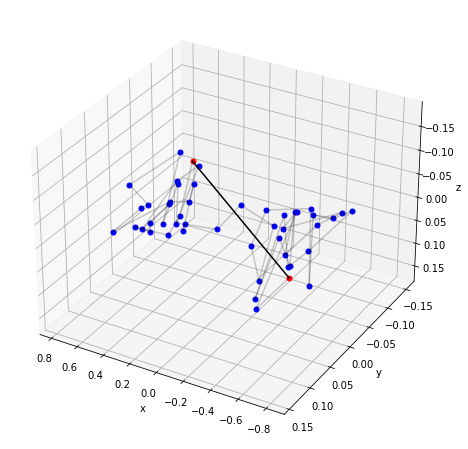

In [27]:
xlim = (R[:,:,0].max(), R[:,:,0].min())
ylim = (R[:,:,1].max(), R[:,:,1].min())
zlim = (R[:,:,2].max(), R[:,:,2].min())
files = []
for i in range(len(t)):
    
    if i%843==0:
        plt.clf()
        fig = plt.figure(figsize=(12,8));
        ax = fig.add_subplot(111, projection='3d')
        for point_i, point in enumerate(R[i]):
            if point_i==0:
                ax.plot(point[0], point[1], point[2], color='red', linestyle='', marker='o', markersize=5)
            elif point_i == N-1:
                ax.plot(point[0], point[1], point[2], color='red', linestyle='', marker='o', markersize=5)
            else:
                ax.plot(point[0], point[1], point[2], color='blue', linestyle='', marker='o', markersize=5)
        
        bonds = np.stack((R[i][:-1], R[i][1:]), axis=1)
        end2end = np.vstack((R[i][-1], R[i][0]))
        
        for b in bonds:
            ax.plot(b[:,0], b[:,1], b[:,2], linestyle='-', color='black', alpha=0.2)
        ax.plot(end2end[:,0], end2end[:,1], end2end[:,2], linestyle='-', color='black')
        
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_zlim(zlim)
        
        #filename = f'./figures/frame_{int(i/7843)}.png'
        #plt.savefig(filename)
        #files.append(filename)
        
        plt.draw()
        IPython.display.clear_output(wait=True)
        IPython.display.display(fig)
    plt.close()
IPython.display.clear_output(wait=True)

In [28]:
E = np.zeros(len(t))
for i in range(len(t)):
    E[i] = calc_energy(R[i], R[i])

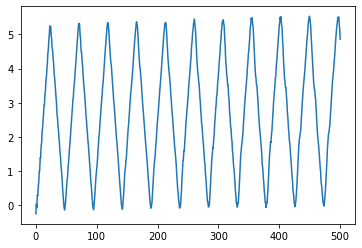

In [29]:
plt.plot(t, E)

In [30]:
def radius_of_gyration(r, m):
    
    M = m.sum()
    
    r_cm = (m*r).sum(axis=0) / M
    
    Rg2 = np.linalg.norm(np.sqrt(m) * (r - r_cm))**2 / M
    
    return np.sqrt(Rg2)

In [31]:
def end2end_distance(r):
    return np.linalg.norm(r[-1] - r[0])

In [32]:
m = np.ones([N, 1])
R_g = np.zeros(len(t))
for i in tqdm(range(len(t))):
    R_g[i] = radius_of_gyration(R[i], m)

100%|██████████| 50000/50000 [00:00<00:00, 55679.54it/s]


In [33]:
R_e = np.zeros(len(t))
for i in tqdm(range(len(t))):
    R_e[i] = end2end_distance(R[i])

100%|██████████| 50000/50000 [00:00<00:00, 198230.14it/s]


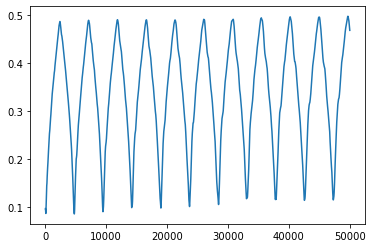

In [34]:
plt.plot(R_g)

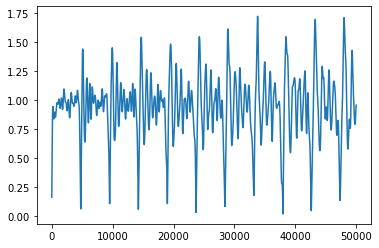

In [35]:
plt.plot(R_e)

In [36]:
kb = 1.380649e-23
cv = ((E-E[0])**2).mean() / (N * .1**2)
print(cv)

23.807341512741093
